In [18]:
import tensorflow as tf 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt

In [6]:
# Supporting functions
def plot_history_net(history):
    """Plot the history of the neural network with accuracy, loss, val_loss, val_accuracy"""

    feature_list = list(history.history.keys())
    epoch_range = range(1, len(history.history[feature_list[0]])+1)

    fig, ax = plt.subplots(ncols=len(feature_list), figsize=(25,5))

    for i in range(0, len(feature_list)):
        ax[i].plot(epoch_range, history.history[feature_list[i]], color="navy")
        ax[i].set_title(feature_list[i])

    plt.show()

We will use the MNIST dataset that is build into tensorflow to learn about the deep neural network. **The aim is to predict the handwriting**.

The dataset consists of 60,000 handwritten digits by students and teachers as well as an additional 10,000 that can be used to validate the model. Each digit is 28x28 pixels with a gray scale from 0 to 255 (RGB) indicating the strenght per pixel. After reading the data we will flaten the digits from two dimensional 28x28 to one dimensional 784. This will mean we loose information but that's fne for this purpose.

We will build a shallow neural network with the following characteristics:
* input: 28 x 28 = 784
* hidden: 64 sigmoid neurons
* output: 10 softmax neurons

In [7]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

print("Length Training data:", len(X_train), len(y_train))
print("Length Validation data:", len(X_valid), len(y_valid))

print("Sample of one digit:", len(X_train[0]), "x", len(X_train[0][0]))

Length Training data: 60000 60000
Length Validation data: 10000 10000
Sample of one digit: 28 x 28


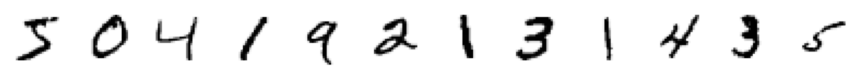

The first 12 digits we plot are: [5 0 4 1 9 2 1 3 1 4 3 5]


In [8]:
# Plot some figures.
plt.figure(figsize=(12,5))
for k in range(12):
    plt.subplot(1, 12, k+1)
    plt.imshow(X_train[k], cmap="Greys")
    plt.axis("off")
plt.tight_layout()
plt.show()
print("The first 12 digits we plot are:", y_train[0:12])


## Reformating the data

We first need to convert the dataset from 2-dimensional to one dimensional. We can do that with the reshape() function. Then we have to adjust the values which are between 0-255 to 0-1.

After that we need to convert the integer value labels. For that we will be using the one-hot-encoder. 

In [9]:
print("Dimensions before reshape():", X_train.shape)

X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

print("Dimensions after reshape():", X_train.shape)

Dimensions before reshape(): (60000, 28, 28)
Dimensions after reshape(): (60000, 784)


In [10]:
X_train /= 255
X_valid /= 255

In [11]:
n_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, n_classes)
y_valid = tf.keras.utils.to_categorical(y_valid, n_classes)

## Design the neural network

In [12]:
model = Sequential()
model.add(Dense(64, activation="relu", input_shape=(784,)))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="Adam", loss="mse", metrics=["mse"])

## Training the neural network

In [13]:
history = model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=200,
    verbose=1,
    validation_data=(X_valid, y_valid)
)

Epoch 1/200
469/469 [==============================] - 1s 859us/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 2/200
469/469 [==============================] - 0s 688us/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 3/200
469/469 [==============================] - 0s 678us/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 4/200
469/469 [==============================] - 0s 684us/step - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 5/200
469/469 [==============================] - 0s 676us/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 6/200
469/469 [==============================] - 0s 686us/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 7/200
469/469 [==============================] - 0s 678us/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 8/200
469/469 [==============================] - 

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


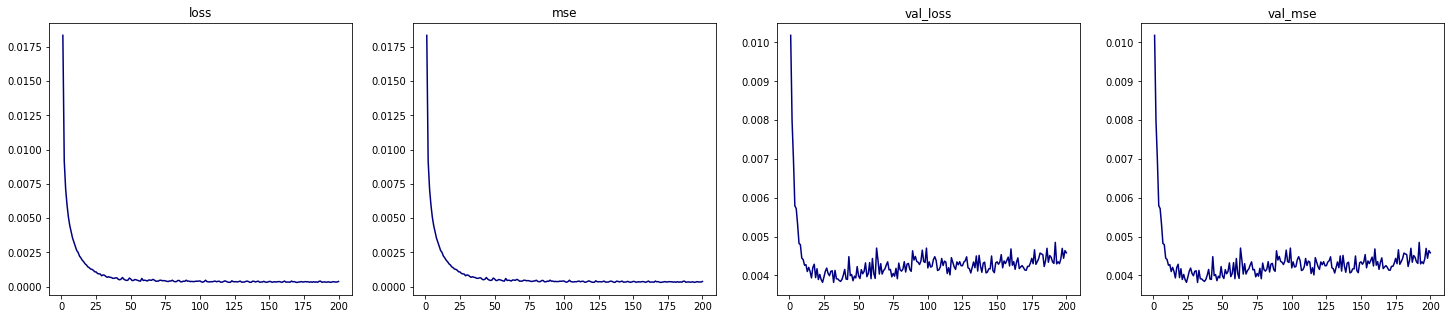

In [15]:
plot_history_net(history)

## Learning and comparing a Intermediate Net

In [16]:
model = Sequential()
model.add(Dense(64, activation="relu", input_shape=(784,)))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [19]:
model.compile(
    loss="categorical_crossentropy",
    optimizer=SGD(learning_rate=0.1),
    metrics=["accuracy"]
)

In [20]:
history = model.fit(
    X_train, y_train,
    batch_size=128, 
    epochs=20,
    verbose=1,
    validation_data=(X_valid, y_valid)
)

Epoch 1/20
469/469 [==============================] - 1s 985us/step - loss: 0.4908 - accuracy: 0.8592 - val_loss: 0.2563 - val_accuracy: 0.9254
Epoch 2/20
469/469 [==============================] - 0s 831us/step - loss: 0.2292 - accuracy: 0.9334 - val_loss: 0.2082 - val_accuracy: 0.9345
Epoch 3/20
469/469 [==============================] - 0s 951us/step - loss: 0.1779 - accuracy: 0.9481 - val_loss: 0.1555 - val_accuracy: 0.9537
Epoch 4/20
469/469 [==============================] - 0s 1ms/step - loss: 0.1477 - accuracy: 0.9564 - val_loss: 0.1410 - val_accuracy: 0.9569
Epoch 5/20
469/469 [==============================] - 0s 867us/step - loss: 0.1254 - accuracy: 0.9636 - val_loss: 0.1206 - val_accuracy: 0.9646
Epoch 6/20
469/469 [==============================] - 0s 754us/step - loss: 0.1089 - accuracy: 0.9680 - val_loss: 0.1168 - val_accuracy: 0.9646
Epoch 7/20
469/469 [==============================] - 0s 703us/step - loss: 0.0966 - accuracy: 0.9714 - val_loss: 0.1055 - val_accuracy: 0

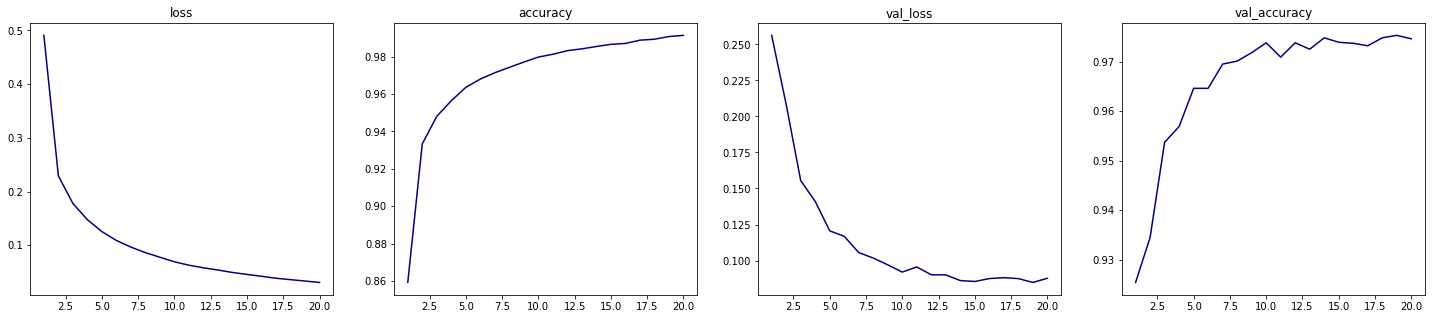

In [21]:
plot_history_net(history)

## Applying the optimization

After working through the chapter in the book we are now able to apply the full network and re-build it.

In [22]:
model = Sequential()

model.add(Dense(64, activation="relu", input_shape=(784,)))
model.add(BatchNormalization())

model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())

model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(10, activation="softmax"))

In [23]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [24]:
history = model.fit(
    X_train, y_train,
    batch_size=128, 
    epochs=20,
    verbose=1,
    validation_data=(X_valid, y_valid)
)

Epoch 1/20
469/469 [==============================] - 2s 2ms/step - loss: 0.3747 - accuracy: 0.8871 - val_loss: 0.1581 - val_accuracy: 0.9516
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1487 - accuracy: 0.9556 - val_loss: 0.1151 - val_accuracy: 0.9655
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1125 - accuracy: 0.9655 - val_loss: 0.1060 - val_accuracy: 0.9672
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0896 - accuracy: 0.9719 - val_loss: 0.1042 - val_accuracy: 0.9681
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0754 - accuracy: 0.9765 - val_loss: 0.0938 - val_accuracy: 0.9735
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0632 - accuracy: 0.9801 - val_loss: 0.0833 - val_accuracy: 0.9732
Epoch 7/20
469/469 [==============================] - 1s 1ms/step - loss: 0.0573 - accuracy: 0.9819 - val_loss: 0.0979 - val_accuracy: 0.9699
Epoch 

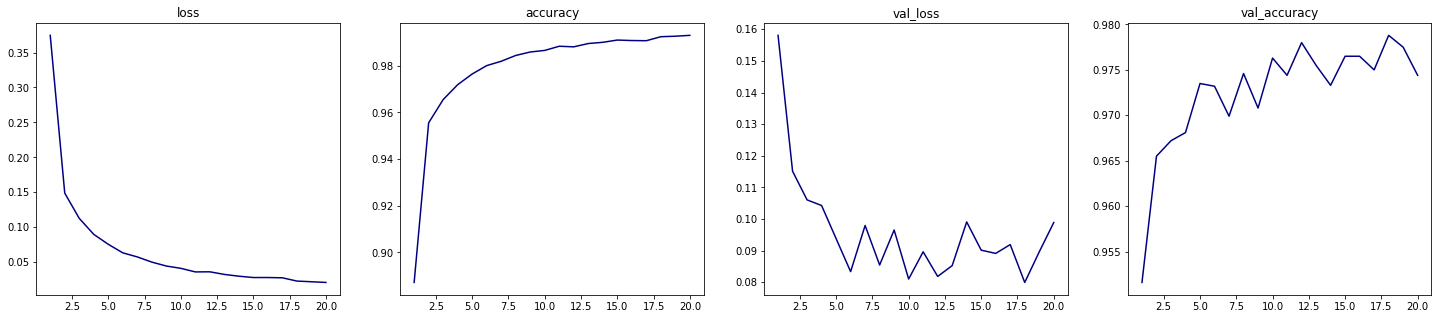

In [25]:
plot_history_net(history)